# New York City Citywide Mobility Survey 2019
# Exploratory Visual Analysis

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Merge data frames
#### 3. Exploring relationships

## Import libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [18]:
# Check the version of matplotlib library
matplotlib.__version__

'3.7.1'

In [19]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

## Import dataframe "Trips"

In [20]:
# Define path
path = r'/Users/peimei/11-2023 New York City Citywide Mobility Survey 2019'

# Join the path using 'os.path.join'
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'Citywide_Mobility_Survey_Trips_Clean.csv')

# Read the CSV file into a DataFrame
trips = pd.read_csv(file_path, index_col = [0],low_memory=False)

# Display the first few rows of the DataFrame
trips.head()

,hh_id,trip_weight,home_cms_zone,survey_mode,person_id,day_num,travel_date,travel_date_dow,trip_id,trip_num,...,long_distance_flag,invalid_purpose_flag,o_purpose_imputed,d_purpose_imputed,o_purpose_category_imputed,d_purpose_category_imputed,o_location_type_imputed,d_location_type_imputed,o_congestion,d_congestion
0,19000235,0.0,Northern Bronx,smartphone app,1900023501,1,2019-05-30,Thursday,1900023501001,1,...,0,0,"-9,998",10,Missing: Non-response,Work,4,2,1,0
3,19000235,0.0,Northern Bronx,smartphone app,1900023501,3,2019-06-01,Saturday,1900023501004,4,...,0,0,10,1,Work,Home,2,1,0,0
12,19000235,0.0,Northern Bronx,smartphone app,1900023501,4,2019-06-02,Sunday,1900023501013,13,...,0,0,"-9,998",50,Missing: Non-response,Meal,4,4,0,0
13,19000235,0.0,Northern Bronx,smartphone app,1900023501,4,2019-06-02,Sunday,1900023501014,14,...,0,0,50,50,Meal,Meal,4,4,0,0
15,19000235,0.0,Northern Bronx,smartphone app,1900023501,5,2019-06-03,Monday,1900023501016,16,...,0,0,"-9,998",50,Missing: Non-response,Meal,4,4,0,0


In [21]:
trips.shape

(74923, 38)

## Import dataframe 'Person'

In [22]:
# import dataframe 'Person'

# Join the path using 'os.path.join'
file_path = os.path.join(path, '02 Data', 'Original Data', 'Citywide_Mobility_Survey_-_Person_Survey_2019_20231108.csv')

# Define list of variables to be imported
vars_list = ['person_id','age', 'jobs_count', 'industry']

# Read the CSV file into a DataFrame
person = pd.read_csv(file_path, sep=";", index_col = False, low_memory=False, usecols = vars_list)

In [23]:
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   person_id   8286 non-null   int64 
 1   age         8286 non-null   int64 
 2   jobs_count  8286 non-null   object
 3   industry    8286 non-null   object
dtypes: int64(2), object(2)
memory usage: 259.1+ KB


In [24]:
person.describe()

,person_id,age
count,8.286000e+03,8286.000000
mean,2.468398e+09,5.718561
std,2.974500e+09,2.402113
min,1.900024e+09,1.000000
25%,1.926343e+09,4.000000
50%,1.951784e+09,6.000000
75%,1.979496e+09,8.000000
max,1.999892e+10,11.000000


## Merge df "Trips" and df "Person"

In [25]:
# Merge dataframes

trips_person = trips.merge(person, on = 'person_id', how = 'left')
trips_person.shape

(74923, 41)

In [26]:
# Check output

trips_person.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74923 entries, 0 to 74922
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hh_id                       74923 non-null  int64  
 1   trip_weight                 74923 non-null  float64
 2   home_cms_zone               74923 non-null  object 
 3   survey_mode                 74923 non-null  object 
 4   person_id                   74923 non-null  int64  
 5   day_num                     74923 non-null  int64  
 6   travel_date                 74923 non-null  object 
 7   travel_date_dow             74923 non-null  object 
 8   trip_id                     74923 non-null  int64  
 9   trip_num                    74923 non-null  int64  
 10  leg_num                     74923 non-null  int64  
 11  depart_date                 74923 non-null  object 
 12  arrive_date                 74923 non-null  object 
 13  o_cms_zone                  696

In [27]:
# Imputation for column 'industry'

# Define a mapping of numerical values to corresponding texts
industry_mapping = {
    '-9,998': 'Missing: Non-response',
    '1': 'Financial services',
    '2': 'Real estate',
    '3': 'Capital goods (aerospace & defense, electrical, machinery)',
    '4': 'Professional and business services (consulting, legal, marketing)',
    '5': 'Hospitality',
    '6': 'Energy (oil, gas, and coal)',
    '7': 'Education',
    '8': 'Health care/social assistance',
    '9': 'Arts and entertainment',
    '10': 'Retail',
    '11': 'Manufacturing',
    '12': 'Transportation and utilities',
    '13': 'Construction',
    '14': 'Government',
    '15': 'Non-profit',
    '16': 'Technology and telecommunications',
    '17': 'Media',
    '18': 'Other',
    '995': 'Missing: Skip logic'
}

# Replace numerical values with corresponding texts
trips_person['industry'] = trips_person['industry'].replace(industry_mapping)

In [28]:
trips_person['industry'].value_counts(dropna = False)

Missing: Skip logic                                                  14423
Health care/social assistance                                         8392
Education                                                             7324
Other                                                                 6440
Professional and business services (consulting, legal, marketing)     5768
Financial services                                                    5336
Government                                                            4175
Transportation and utilities                                          3368
Technology and telecommunications                                     3221
Retail                                                                3052
Arts and entertainment                                                2959
Non-profit                                                            2821
Hospitality                                                           1900
Media                    

# Exploratory Visual Analysis

## Create a correlation heatmap using seaborn

In [29]:
# Convert data type of 'jobs_count' 

trips_person['jobs_count'] = trips_person['jobs_count'].str.replace(',', '').astype('int64')

In [30]:
# Save a subset

sub = trips_person[['age','jobs_count','trip_duration_min','trip_distance_mile']]

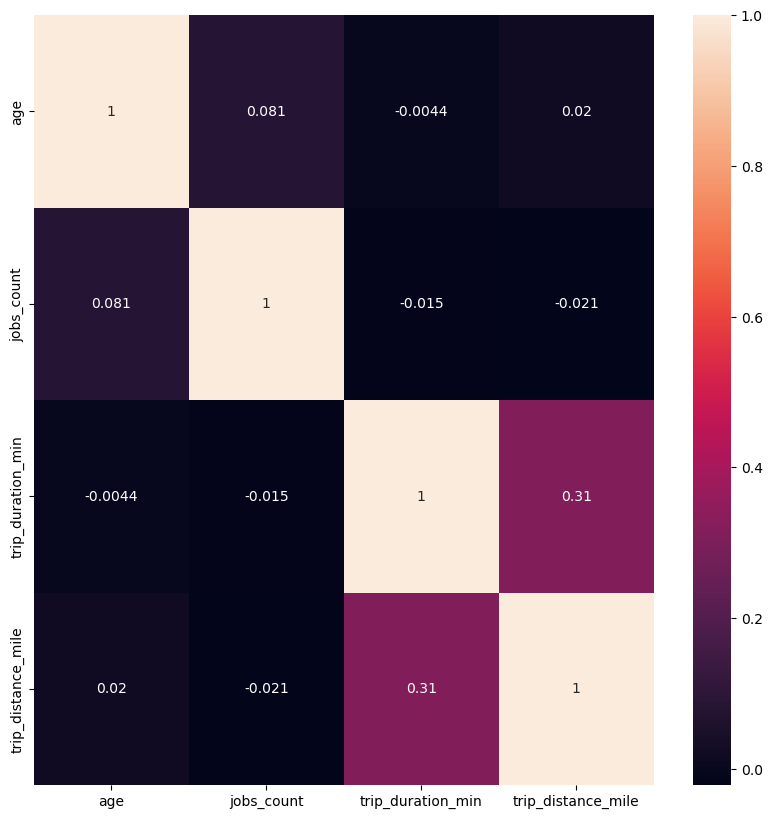

In [35]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'correlation_heatmap.png'))

0: no relationship <br/>
0.1–0.3: weak relationship <br/>
0.3–0.5: moderate relationship <br/>
0.5–1.0: strong relationship

### Task: Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

### Answer: 
#### The coefficients reflect how strong the relatioship between any given two variables is. In the heatmap above, the highest value is 0.31 betweeen the trip distance and trip duration, which indicates a week-moderate correlation. All the rest are close to zero.

## Create a scatterplot for "trip_distance_mile" and "trip_duration_min"

In [ ]:
# Create a scatterplot in seaborn
sns.lmplot(x = 'trip_distance_mile', y = 'trip_duration_min', data = trips_person)

# Set x-axis ticks
plt.xticks(range(0, int(trips_person['trip_distance_mile'].max()) + 1, 100))

# Set y-axis ticks
plt.yticks(range(0, int(trips_person['trip_duration_min'].max()) + 1, 100))

# Show the plot
plt.show()

### A closer look at lower left corner of scatterplot

In [ ]:
# Create a scatterplot in seaborn
sns.lmplot(x='trip_distance_mile', y='trip_duration_min', data=trips_person)

# Set x-axis and y-axis limits
plt.xlim(0, 100)
plt.ylim(0, 100)

# Set x-axis ticks
plt.xticks(range(0, 101, 20))

# Set y-axis ticks
plt.yticks(range(0, 101, 20))

# Show the plot
plt.show()


### Task: Discuss the output in a markdown cell.

### Answer:  
#### Apart from knowing these two variables are weakly correlated, we can see the data points are scattered over a large range on both the x and y-axes and especially on the y-axis. This suggests there’s a great degree of variability.

## Create a pair plot

In [ ]:
sub['jobs_count'].value_counts(dropna = False)

In [ ]:
# Remove rows with the code 995 and code -9998 in column 'jobs_count'
sub = sub[(sub['jobs_count'] != 995) & (sub['jobs_count'] != -9998)]

In [ ]:
sub['jobs_count'].value_counts(dropna = False)

In [ ]:
# Create a pair plot 

g1 = sns.pairplot(sub)

### Task: Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

### Answer:
#### I would like to explore the relationship between age, trip duration and trip distance. Because there seems to be some degree of negative correlation between age and trip duration as well as age and trip distance respectively. 

## Create a categorical plot

In [ ]:
# Create a histogram
sns.histplot(trips_person['trip_distance_mile'], bins = 10, kde = True)

In [ ]:
# Zoom in on the histogram (x = 100, y = 45000)

# Adjust the number of bins
sns.histplot(trips_person['trip_distance_mile'], bins=1000, kde=True)

# Limit x-axis and y-axis values
plt.xlim(0, 100)  
plt.ylim(0, 45000)  

# Set y-tick values 
plt.yticks(range(0, 45001, 5000))

# Set labels and title
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distances')

# Show the plot
plt.show()

In [ ]:
# Zoom in further on the histogram (x = 30, y = 45000)

# Adjust the number of bins
sns.histplot(trips_person['trip_distance_mile'], bins=1000, kde=True)

# Set labels and title
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distances')

# Limit x-axis and y-axis values
plt.xlim(0, 30)  
plt.ylim(0, 45000)  

# Set y-tick values 
plt.yticks(range(0, 45001, 5000))

# Show the plot
plt.show()


In [ ]:
# Create distance categories
trips_person.loc[trips_person['trip_distance_mile'] <= 1, 'distance_category'] = 'within 1 mile'

In [ ]:
trips_person.loc[(trips_person['trip_distance_mile'] > 1) & (trips_person['trip_distance_mile'] <= 3), 'distance_category'] = '1-3 miles'

In [ ]:
trips_person.loc[trips_person['trip_distance_mile'] > 3, 'distance_category'] = '>3 miles'

In [ ]:
trips_person['distance_category'].value_counts(dropna = False)

In [ ]:
# Imputation for column 'age'
# Define a mapping of numerical values to corresponding texts for 'age'
age_mapping = {
    -9998: 'Missing: Non-response',
    1: 'Under 5',
    2: '5-15',
    3: '16-17',
    4: '18-24',
    5: '25-34',
    6: '35-44',
    7: '45-54',
    8: '55-64',
    9: '65-74',
    10: '75-84',
    11: '85 or older',
    995: 'Missing: Skip logic'
}

# Assuming 'age' column contains integers
trips_person['age'] = trips_person['age'].replace(age_mapping)

In [ ]:
trips_person['age'].value_counts(dropna = False)

In [ ]:
# Create a categorical plot in seaborn using the price categories created above

# Specify the desired order of x-values
age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85 or older']

sns.set(style="ticks")
g2 = sns.catplot(x='age', y='trip_distance_mile', hue="distance_category", data=trips_person,order=age_order, height=4, aspect=2)
plt.ylim(0, 30)  # Set y-axis limit 

In [ ]:
# Export viz
g2.savefig(os.path.join(path, '04 Analysis','Visualizations', 'catplot_age_trip-distance.png'))

### Task: Interpret the results.

### Answer: 
1. This catplot shows us the distribution of trip distance per survey participant age. In the distance category of ">3 miles", we see that the cluster density of data points increases from the age group 18-24 for two further age groups and then decreases from the age group 45-54 and onward. 
2. The age group "85 or older" exhibits the smallest number of data points, with a notable scarcity of instances extending beyond 10 miles in trip distance.

In [ ]:
# Export trips_person as csv

trips_person.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Citywide_Mobility_Survey_Trips_Person.csv'))

In [ ]:
trips_person.shape